# The Problem Description:

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo- located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, secularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

Data Description:

The Street View House Numbers (SVHN) Dataset
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.


# Objective

The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows:

1. Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
2. Data fetching and understand the train/val/test splits. 
3. Implement and apply a deep neural network classifier including
(feedforward neural network, RELU, activations) 
4. Understand and be able to implement (vectorised) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) 
5. Implement batch normalization for training the neural network 
6. Print the classification accuracy metrics 

In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf

Using TensorFlow backend.


In [2]:
tf.__version__

'2.1.0'

# Data fetching and understand the train/val/test splits.

In [3]:
#Open the file as readonly
data = h5py.File("SVHN_single_grey1.h5",'r')

In [4]:
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [5]:
#Load the training, testing, and validation data
X_train = data['X_train']
X_test = data['X_test']
X_val = data['X_val']
y_train = data['y_train']
y_test = data['y_test']
y_val = data['y_val']

In [6]:
# Printing the shape and data type of training, testing, and validation data
print("Shape of Data")
print("--------------------------------------------------------------------------")
print("Training data X    :", X_train.shape)
print("Testing data X     :", X_test.shape)
print("Validation data X  :", X_val.shape)
print("Training data y    :", y_train.shape)
print("Testing data y     :", y_test.shape)
print("Validation data y  :", y_val.shape)

print("Data type")
print("--------------------------------------------------------------------------")
print("Training data X    :", X_train.dtype)
print("Testing data X     :", X_test.dtype)
print("Validation data X  :", X_val.dtype)
print("Training data y    :", y_train.dtype)
print("Testing data y     :", y_test.dtype)
print("Validation data y  :", y_val.dtype)



Shape of Data
--------------------------------------------------------------------------
Training data X    : (42000, 32, 32)
Testing data X     : (18000, 32, 32)
Validation data X  : (60000, 32, 32)
Training data y    : (42000,)
Testing data y     : (18000,)
Validation data y  : (60000,)
Data type
--------------------------------------------------------------------------
Training data X    : float32
Testing data X     : float32
Validation data X  : float32
Training data y    : uint8
Testing data y     : uint8
Validation data y  : uint8


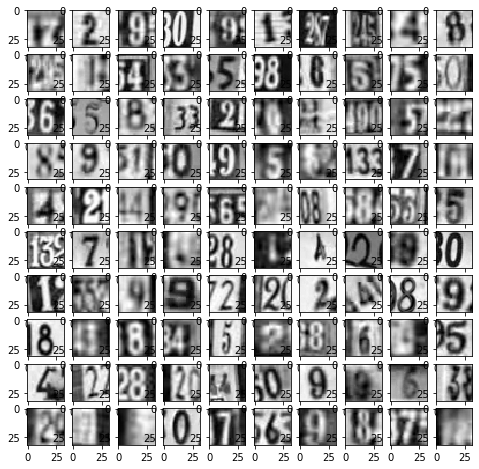

In [7]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
columns = 10
rows = 10
for i in range(1, columns * rows + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()


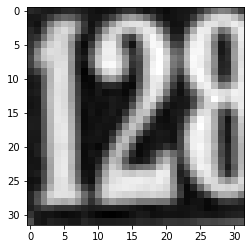

Label:  2


In [8]:
# show the number in the dataset
plt.imshow(X_train[0], cmap = 'gray')    
plt.show()
print('Label: ', y_train[0])

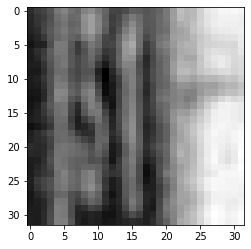

Label:  1


In [9]:
# show the number in the dataset
plt.imshow(X_test[0], cmap = 'gray')    
plt.show()
print('Label: ', y_test[0])

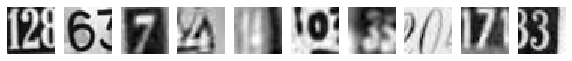

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [10]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [11]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

Converting output label to multiple values

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes = 10)

In [13]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


# Basic NN model

In [14]:
model = Sequential()

model.add(Dense(512, input_shape = (1024, )))
model.add(Activation('sigmoid'))
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [15]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 3s 63us/step - loss: 2.3216 - accuracy: 0.0994
Epoch 2/10
42000/42000 [==============================] - 2s 54us/step - loss: 2.3029 - accuracy: 0.0985
Epoch 3/10
42000/42000 [==============================] - 2s 56us/step - loss: 2.3027 - accuracy: 0.0996
Epoch 4/10
42000/42000 [==============================] - 2s 50us/step - loss: 2.3027 - accuracy: 0.1013
Epoch 5/10
42000/42000 [==============================] - 2s 51us/step - loss: 2.3027 - accuracy: 0.0988
Epoch 6/10
42000/42000 [==============================] - 2s 51us/step - loss: 2.3027 - accuracy: 0.1015
Epoch 7/10
42000/42000 [==============================] - 2s 52us/step - loss: 2.3026 - accuracy: 0.1003
Epoch 8/10
42000/42000 [==============================] - 3s 62us/step - loss: 2.3026 - accuracy: 0.1018
Epoch 9/10
42000/42000 [==============================] - 3s 81us/step - loss: 2.3026 - accuracy: 0.1012
Epoch 10/10
42000/42000 [==============================

In [17]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 51us/step


In [18]:
print('Test accuracy: ', results[1])

Test accuracy:  0.10561110824346542


Accuracy is too low with basic NN model

# Now, we will train Neural network using below techniques

# 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree
Ref: https://keras.io/initializers/

In [19]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(512, input_shape = (1024, ), kernel_initializer='he_normal'))   # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(256, kernel_initializer='he_normal'))                           # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(128, kernel_initializer='he_normal'))                           # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(64, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(32, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [20]:
model = mlp_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [21]:
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
42000/42000 [==============================] - 3s 73us/step - loss: 2.4564 - accuracy: 0.1019
Epoch 2/100
42000/42000 [==============================] - 4s 94us/step - loss: 2.3689 - accuracy: 0.1019
Epoch 3/100
42000/42000 [==============================] - 3s 69us/step - loss: 2.3355 - accuracy: 0.1019
Epoch 4/100
42000/42000 [==============================] - 3s 71us/step - loss: 2.3200 - accuracy: 0.1019
Epoch 5/100
42000/42000 [==============================] - 2s 57us/step - loss: 2.3121 - accuracy: 0.1019
Epoch 6/100
42000/42000 [==============================] - 2s 54us/step - loss: 2.3079 - accuracy: 0.1019
Epoch 7/100
42000/42000 [==============================] - 2s 55us/step - loss: 2.3055 - accuracy: 0.1019
Epoch 8/100
42000/42000 [==============================] - 2s 56us/step - loss: 2.3042 - accuracy: 0.1019
Epoch 9/100
42000/42000 [==============================] - 2s 56us/step - loss: 2.3035 - accuracy: 0.1019
Epoch 10/100
42000/42000 [====================

42000/42000 [==============================] - 2s 53us/step - loss: 2.3022 - accuracy: 0.1021
Epoch 78/100
42000/42000 [==============================] - 2s 54us/step - loss: 2.3022 - accuracy: 0.1021
Epoch 79/100
42000/42000 [==============================] - 2s 55us/step - loss: 2.3022 - accuracy: 0.1019
Epoch 80/100
42000/42000 [==============================] - 2s 58us/step - loss: 2.3022 - accuracy: 0.1026
Epoch 81/100
42000/42000 [==============================] - 2s 55us/step - loss: 2.3022 - accuracy: 0.1023
Epoch 82/100
42000/42000 [==============================] - 2s 54us/step - loss: 2.3022 - accuracy: 0.1017
Epoch 83/100
42000/42000 [==============================] - 2s 55us/step - loss: 2.3022 - accuracy: 0.1020
Epoch 84/100
42000/42000 [==============================] - 2s 54us/step - loss: 2.3022 - accuracy: 0.1020
Epoch 85/100
42000/42000 [==============================] - 2s 55us/step - loss: 2.3022 - accuracy: 0.1027
Epoch 86/100
42000/42000 [========================

In [22]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 55us/step


In [23]:
print('Test accuracy: ', results[1])

Test accuracy:  0.09561111032962799


# 2. Nonlinearity (Activation function)

# Implement and apply a deep neural network classifier including
(feedforward neural network, RELU, activations) 


Sigmoid functions suffer from gradient vanishing problem, making training slower
There are many choices apart from sigmoid and tanh; try many of them!
'relu' (rectified linear unit) is one of the most popular ones
Ref: https://keras.io/activations/

In [24]:
##Initialize the Artificial Neural Network Classifier

In [25]:
 
    model_sgd = Sequential()
    #Adding Input layer and activation functions ReLU
    model_sgd.add(Dense(512, kernel_initializer='he_normal', input_shape = (1024, )))
    #Adding Activation function
    model_sgd.add(Activation('relu'))    

    #Hidden Layer 1
    #Adding first Hidden layer
    model_sgd.add(Dense(256, kernel_initializer='he_normal'))
    model_sgd.add(Activation('relu'))    

    #Hidden Layer 2
    #Adding second Hidden layer
    model_sgd.add(Dense(128, kernel_initializer='he_normal'))
    model_sgd.add(Activation('relu'))    

    #Hidden Layer 3
    #Adding third Hidden layer
    model_sgd.add(Dense(64, kernel_initializer='he_normal'))
    model_sgd.add(Activation('relu'))    

    #Hidden Layer 4
    #Adding fourth Hidden layer
    model_sgd.add(Dense(32, kernel_initializer='he_normal'))
    model_sgd.add(Activation('relu'))    

    # Output Layer
    #Adding output layer which is of 10 nodes (digits)
    model_sgd.add(Dense(10))
    model_sgd.add(Activation('softmax'))

    #ANN classifier
    sgd = optimizers.SGD(lr = 0.001)
    model_sgd.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
 

In [26]:
model_sgd.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_15 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

In [27]:
# Fitting the ANN to the Training data
history = model_sgd.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 84us/step - loss: 330243167.2661 - accuracy: 0.1009 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
42000/42000 [==============================] - 3s 80us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
42000/42000 [==============================] - 3s 78us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
42000/42000 [==============================] - 3s 81us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
42000/42000 [==============================] - 3s 78us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
42000/42000 [==============================] - 3s 79us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
42000/42000 [==============================] - 3s

In [28]:
results = model_sgd.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 50us/step


In [29]:
print('Test accuracy: ', results[1])

Test accuracy:  0.09549999982118607


# Using adam optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [30]:
# compiling the ANN classifier
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
# Fitting the ANN to the Training data
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 119us/step - loss: 2.3062 - accuracy: 0.0998 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 2/10
42000/42000 [==============================] - 5s 120us/step - loss: 2.3051 - accuracy: 0.1003 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 3/10
42000/42000 [==============================] - 5s 115us/step - loss: 2.3046 - accuracy: 0.0991 - val_loss: 2.3054 - val_accuracy: 0.1000
Epoch 4/10
42000/42000 [==============================] - 5s 115us/step - loss: 2.3049 - accuracy: 0.0998 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 5/10
42000/42000 [==============================] - 5s 115us/step - loss: 2.3043 - accuracy: 0.1015 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 6/10
42000/42000 [==============================] - 5s 114us/step - loss: 2.3045 - accuracy: 0.1000 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 7/10
42000/42000 [==============================] - 5s 1

The accuracy of the model on val data is very low either using adam or sgd.

### Now, try to change the learning rate in SGD optimizer

As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.

In [32]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.SGD(lr = 0.0001)

# compiling the ANN classifier
model_sgd.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training data
history = model_sgd.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 85us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/100
42000/42000 [==============================] - 3s 81us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/100
42000/42000 [==============================] - 3s 81us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/100
42000/42000 [==============================] - 3s 83us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/100
42000/42000 [==============================] - 4s 86us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/100
42000/42000 [==============================] - 3s 83us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/100
42000/42000 [==============================] - 4s 

Epoch 56/100
42000/42000 [==============================] - 3s 79us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 57/100
42000/42000 [==============================] - 3s 80us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 58/100
42000/42000 [==============================] - 3s 82us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 59/100
42000/42000 [==============================] - 3s 80us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 60/100
42000/42000 [==============================] - 3s 80us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 61/100
42000/42000 [==============================] - 3s 81us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 62/100
42000/42000 [==============================] - 3s 79us/step - loss: 2.3026 - accuracy: 0.1019

The accuracy of the model on val data using sgd with learning rate=0.0001 is improving a bit but not much.

In [33]:
results = model_sgd.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 50us/step


In [34]:
print('Test accuracy: ', results[1])

Test accuracy:  0.09549999982118607


In [35]:
#Setting the learning rate  and decay in Adam
adam = optimizers.Adam(lr = 0.0001)

# compiling the ANN classifier
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 119us/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3019 - val_accuracy: 0.1000
Epoch 2/100
42000/42000 [==============================] - 5s 119us/step - loss: 2.3014 - accuracy: 0.1017 - val_loss: 2.3010 - val_accuracy: 0.1059
Epoch 3/100
42000/42000 [==============================] - 5s 111us/step - loss: 2.3002 - accuracy: 0.1031 - val_loss: 2.2990 - val_accuracy: 0.1114
Epoch 4/100
42000/42000 [==============================] - 5s 112us/step - loss: 2.2973 - accuracy: 0.1196 - val_loss: 2.2944 - val_accuracy: 0.1153
Epoch 5/100
42000/42000 [==============================] - 5s 111us/step - loss: 2.2917 - accuracy: 0.1189 - val_loss: 2.2871 - val_accuracy: 0.1258
Epoch 6/100
42000/42000 [==============================] - 5s 115us/step - loss: 2.2824 - accuracy: 0.1279 - val_loss: 2.2769 - val_accuracy: 0.1307
Epoch 7/100
42000/42000 [==============================]

42000/42000 [==============================] - 5s 117us/step - loss: 2.0932 - accuracy: 0.1860 - val_loss: 2.0827 - val_accuracy: 0.1943
Epoch 56/100
42000/42000 [==============================] - 5s 116us/step - loss: 2.0919 - accuracy: 0.1882 - val_loss: 2.0940 - val_accuracy: 0.1885
Epoch 57/100
42000/42000 [==============================] - 5s 116us/step - loss: 2.0942 - accuracy: 0.1857 - val_loss: 2.1296 - val_accuracy: 0.1811
Epoch 58/100
42000/42000 [==============================] - 5s 121us/step - loss: 2.0984 - accuracy: 0.1828 - val_loss: 2.0928 - val_accuracy: 0.1840
Epoch 59/100
42000/42000 [==============================] - 5s 115us/step - loss: 2.0933 - accuracy: 0.1877 - val_loss: 2.0899 - val_accuracy: 0.1913
Epoch 60/100
42000/42000 [==============================] - 5s 115us/step - loss: 2.0938 - accuracy: 0.1897 - val_loss: 2.0878 - val_accuracy: 0.1891
Epoch 61/100
42000/42000 [==============================] - 5s 114us/step - loss: 2.0926 - accuracy: 0.1894 - val

In [36]:
results = model.evaluate(X_val, y_val)
results[1]

60000/60000 [==============================] - 4s 65us/step


0.1903499960899353

In [37]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN'], 'accuracy': results[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.19035


Accuracy is very low, lets see if it improves with batch normalization.

# Implementing batch normalization for training the neural network

In [38]:
model = Sequential()
#Adding Input layer and activation functions ReLU
model.add(Dense(512, kernel_initializer='he_normal', input_shape = (1024, )))
#Adding BatchNormalization Layer
model.add(BatchNormalization())
#Adding Activation function
model.add(Activation('relu'))    

#Hidden Layer 1
#Adding first Hidden layer
model.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model.add(BatchNormalization())
model.add(Activation('relu'))    


#Hidden Layer 2
#Adding second Hidden layer
model.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model.add(BatchNormalization())    
model.add(Activation('relu'))    

#Hidden Layer 3
#Adding third Hidden layer
model.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model.add(BatchNormalization())
model.add(Activation('relu'))    

#Hidden Layer 4
#Adding fourth Hidden layer
model.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model.add(BatchNormalization())
model.add(Activation('relu'))    

# Output Layer
#Adding output layer which is of 10 nodes (digits)
model.add(Dense(10))
model.add(Activation('softmax'))

#ANN classifier
adam = optimizers.Adam(lr = 0.0001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_20 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)              

In [40]:
# Fitting the ANN to the Training data
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 7s 170us/step - loss: 2.1936 - accuracy: 0.2351 - val_loss: 2.0316 - val_accuracy: 0.2887
Epoch 2/100
42000/42000 [==============================] - 6s 142us/step - loss: 1.6390 - accuracy: 0.4876 - val_loss: 1.6954 - val_accuracy: 0.4544
Epoch 3/100
42000/42000 [==============================] - 6s 141us/step - loss: 1.3308 - accuracy: 0.6175 - val_loss: 1.3902 - val_accuracy: 0.5987
Epoch 4/100
42000/42000 [==============================] - 6s 144us/step - loss: 1.1351 - accuracy: 0.6825 - val_loss: 1.2813 - val_accuracy: 0.6167
Epoch 5/100
42000/42000 [==============================] - 6s 141us/step - loss: 0.9915 - accuracy: 0.7246 - val_loss: 1.1432 - val_accuracy: 0.6724
Epoch 6/100
42000/42000 [==============================] - 6s 144us/step - loss: 0.8865 - accuracy: 0.7536 - val_loss: 1.0988 - val_accuracy: 0.6764
Epoch 7/100
42000/42000 [==============================]

42000/42000 [==============================] - 6s 146us/step - loss: 0.0922 - accuracy: 0.9733 - val_loss: 0.7245 - val_accuracy: 0.8075
Epoch 56/100
42000/42000 [==============================] - 6s 141us/step - loss: 0.0868 - accuracy: 0.9761 - val_loss: 0.8326 - val_accuracy: 0.7975
Epoch 57/100
42000/42000 [==============================] - 6s 143us/step - loss: 0.0895 - accuracy: 0.9738 - val_loss: 0.5945 - val_accuracy: 0.8352
Epoch 58/100
42000/42000 [==============================] - 6s 141us/step - loss: 0.0799 - accuracy: 0.9776 - val_loss: 0.8998 - val_accuracy: 0.7844
Epoch 59/100
42000/42000 [==============================] - 6s 140us/step - loss: 0.0854 - accuracy: 0.9746 - val_loss: 0.5766 - val_accuracy: 0.8447
Epoch 60/100
42000/42000 [==============================] - 6s 136us/step - loss: 0.0749 - accuracy: 0.9780 - val_loss: 0.6364 - val_accuracy: 0.8330
Epoch 61/100
42000/42000 [==============================] - 6s 136us/step - loss: 0.0763 - accuracy: 0.9786 - val

In [41]:
results_1 = model.evaluate(X_val, y_val)
results_1[1]

60000/60000 [==============================] - 4s 61us/step


0.8144166469573975

In [42]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Adam'], 'accuracy': [results_1[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.190350
2,NN_Batch_Adam,0.814417


In [43]:

model_sgd = Sequential()
#Adding Input layer and activation functions ReLU
model_sgd.add(Dense(512, kernel_initializer='he_normal', input_shape = (1024, )))
#Adding BatchNormalization Layer
model_sgd.add(BatchNormalization())
#Adding Activation function
model_sgd.add(Activation('relu'))    

#Hidden Layer 1
#Adding first Hidden layer
model_sgd.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_sgd.add(BatchNormalization())
model_sgd.add(Activation('relu'))    


#Hidden Layer 2
#Adding second Hidden layer
model_sgd.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_sgd.add(BatchNormalization())    
model_sgd.add(Activation('relu'))    

#Hidden Layer 3
#Adding third Hidden layer
model_sgd.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_sgd.add(BatchNormalization())
model_sgd.add(Activation('relu'))    

#Hidden Layer 4
#Adding fourth Hidden layer
model_sgd.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_sgd.add(BatchNormalization())
model_sgd.add(Activation('relu'))    

# Output Layer
#Adding output layer which is of 10 nodes (digits)
model_sgd.add(Dense(10))
model_sgd.add(Activation('softmax'))

#ANN classifier
sgd = optimizers.SGD(lr = 0.0001)
model_sgd.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [44]:
model_sgd.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)              

In [45]:
# Fitting the ANN to the Training data
history = model_sgd.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 134us/step - loss: 2.6272 - accuracy: 0.1007 - val_loss: 2.6046 - val_accuracy: 0.1020
Epoch 2/100
42000/42000 [==============================] - 5s 114us/step - loss: 2.6095 - accuracy: 0.1026 - val_loss: 2.5930 - val_accuracy: 0.1036
Epoch 3/100
42000/42000 [==============================] - 5s 113us/step - loss: 2.5931 - accuracy: 0.1043 - val_loss: 2.5799 - val_accuracy: 0.1053
Epoch 4/100
42000/42000 [==============================] - 5s 114us/step - loss: 2.5740 - accuracy: 0.1067 - val_loss: 2.5638 - val_accuracy: 0.1077
Epoch 5/100
42000/42000 [==============================] - 5s 116us/step - loss: 2.5574 - accuracy: 0.1101 - val_loss: 2.5484 - val_accuracy: 0.1098
Epoch 6/100
42000/42000 [==============================] - 5s 113us/step - loss: 2.5440 - accuracy: 0.1125 - val_loss: 2.5362 - val_accuracy: 0.1127
Epoch 7/100
42000/42000 [==============================]

42000/42000 [==============================] - 7s 160us/step - loss: 2.1829 - accuracy: 0.2200 - val_loss: 2.1821 - val_accuracy: 0.2198
Epoch 56/100
42000/42000 [==============================] - 6s 145us/step - loss: 2.1770 - accuracy: 0.2235 - val_loss: 2.1770 - val_accuracy: 0.2224
Epoch 57/100
42000/42000 [==============================] - 7s 156us/step - loss: 2.1736 - accuracy: 0.2234 - val_loss: 2.1726 - val_accuracy: 0.2250
Epoch 58/100
42000/42000 [==============================] - 5s 128us/step - loss: 2.1677 - accuracy: 0.2272 - val_loss: 2.1681 - val_accuracy: 0.2268
Epoch 59/100
42000/42000 [==============================] - 5s 113us/step - loss: 2.1657 - accuracy: 0.2273 - val_loss: 2.1637 - val_accuracy: 0.2290
Epoch 60/100
42000/42000 [==============================] - 5s 120us/step - loss: 2.1590 - accuracy: 0.2312 - val_loss: 2.1594 - val_accuracy: 0.2311
Epoch 61/100
42000/42000 [==============================] - 5s 114us/step - loss: 2.1554 - accuracy: 0.2312 - val

In [46]:
results_2 = model_sgd.evaluate(X_val, y_val)
results_2[1]

60000/60000 [==============================] - 4s 64us/step


0.30836665630340576

In [47]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_sgd'], 'accuracy': [results_2[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.190350
2,NN_Batch_Adam,0.814417
3,NN_Batch_sgd,0.308367


In [48]:

model = Sequential()
#Adding Input layer and activation functions ReLU
model.add(Dense(512, kernel_initializer='he_normal', input_shape = (1024, )))
#Adding BatchNormalization Layer
model.add(BatchNormalization())
#Adding Activation function
model.add(Activation('relu'))    
#Adding Dropout Layer
model.add(Dropout(0.5))


#Hidden Layer 1
#Adding first Hidden layer
model.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model.add(BatchNormalization())
model.add(Activation('relu'))    
#Adding Dropout Layer
model.add(Dropout(0.5))


#Hidden Layer 2
#Adding second Hidden layer
model.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model.add(BatchNormalization())    
model.add(Activation('relu'))    
#Adding Dropout Layer
model.add(Dropout(0.5))


#Hidden Layer 3
#Adding third Hidden layer
model.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model.add(BatchNormalization())
model.add(Activation('relu'))    
#Adding Dropout Layer
model.add(Dropout(0.5))


#Hidden Layer 4
#Adding fourth Hidden layer
model.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model.add(BatchNormalization())
model.add(Activation('relu'))    
#Adding Dropout Layer
model.add(Dropout(0.5))


# Output Layer
#Adding output layer which is of 10 nodes (digits)
model.add(Dense(10))
model.add(Activation('softmax'))

#ANN classifier
adam = optimizers.Adam(lr = 0.0001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [49]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
activation_31 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
activation_32 (Activation)   (None, 256)              

In [50]:
# Fitting the ANN to the Training data
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 8s 201us/step - loss: 2.8247 - accuracy: 0.1012 - val_loss: 2.3233 - val_accuracy: 0.1088
Epoch 2/100
42000/42000 [==============================] - 7s 164us/step - loss: 2.6977 - accuracy: 0.0996 - val_loss: 2.3118 - val_accuracy: 0.1093
Epoch 3/100
42000/42000 [==============================] - 8s 194us/step - loss: 2.6135 - accuracy: 0.1044 - val_loss: 2.3029 - val_accuracy: 0.1175
Epoch 4/100
42000/42000 [==============================] - 7s 164us/step - loss: 2.5496 - accuracy: 0.1053 - val_loss: 2.2992 - val_accuracy: 0.1281
Epoch 5/100
42000/42000 [==============================] - 7s 165us/step - loss: 2.5033 - accuracy: 0.1022 - val_loss: 2.2984 - val_accuracy: 0.1286
Epoch 6/100
42000/42000 [==============================] - 7s 167us/step - loss: 2.4573 - accuracy: 0.1032 - val_loss: 2.2969 - val_accuracy: 0.1302
Epoch 7/100
42000/42000 [==============================]

42000/42000 [==============================] - 6s 154us/step - loss: 1.4660 - accuracy: 0.4537 - val_loss: 1.2040 - val_accuracy: 0.5933
Epoch 56/100
42000/42000 [==============================] - 6s 149us/step - loss: 1.4478 - accuracy: 0.4612 - val_loss: 1.2073 - val_accuracy: 0.5885
Epoch 57/100
42000/42000 [==============================] - 6s 153us/step - loss: 1.4442 - accuracy: 0.4652 - val_loss: 1.2849 - val_accuracy: 0.5605
Epoch 58/100
42000/42000 [==============================] - 6s 148us/step - loss: 1.4312 - accuracy: 0.4650 - val_loss: 1.2539 - val_accuracy: 0.5693
Epoch 59/100
42000/42000 [==============================] - 6s 150us/step - loss: 1.4230 - accuracy: 0.4720 - val_loss: 1.2058 - val_accuracy: 0.5871
Epoch 60/100
42000/42000 [==============================] - 6s 148us/step - loss: 1.4107 - accuracy: 0.4717 - val_loss: 1.2051 - val_accuracy: 0.5826
Epoch 61/100
42000/42000 [==============================] - 6s 150us/step - loss: 1.4069 - accuracy: 0.4751 - val

In [51]:
results_3 = model.evaluate(X_val, y_val)
results_3[1]

60000/60000 [==============================] - 4s 61us/step


0.7052000164985657

In [52]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_Adam'], 'accuracy': [results_3[1]]},index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.190350
2,NN_Batch_Adam,0.814417
3,NN_Batch_sgd,0.308367
4,NN_Batch_Drop_Adam,0.705200


In [53]:

model_sgd = Sequential()
#Adding Input layer and activation functions ReLU
model_sgd.add(Dense(512, kernel_initializer='he_normal', input_shape = (1024, )))
#Adding BatchNormalization Layer
model_sgd.add(BatchNormalization())
#Adding Activation function
model_sgd.add(Activation('relu'))    
#Adding Dropout Layer
model_sgd.add(Dropout(0.5))


#Hidden Layer 1
#Adding first Hidden layer
model_sgd.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_sgd.add(BatchNormalization())
model_sgd.add(Activation('relu'))    
#Adding Dropout Layer
model_sgd.add(Dropout(0.5))


#Hidden Layer 2
#Adding second Hidden layer
model_sgd.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_sgd.add(BatchNormalization())    
model_sgd.add(Activation('relu'))    
#Adding Dropout Layer
model_sgd.add(Dropout(0.5))


#Hidden Layer 3
#Adding third Hidden layer
model_sgd.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_sgd.add(BatchNormalization())
model_sgd.add(Activation('relu'))    
#Adding Dropout Layer
model_sgd.add(Dropout(0.5))


#Hidden Layer 4
#Adding fourth Hidden layer
model_sgd.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_sgd.add(BatchNormalization())
model_sgd.add(Activation('relu'))    
#Adding Dropout Layer
model_sgd.add(Dropout(0.5))


# Output Layer
#Adding output layer which is of 10 nodes (digits)
model_sgd.add(Dense(10))
model_sgd.add(Activation('softmax'))

#ANN classifier
sgd = optimizers.SGD(lr = 0.0001)
model_sgd.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [54]:
model_sgd.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
activation_37 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
activation_38 (Activation)   (None, 256)              

In [55]:
# Fitting the ANN to the Training data
history = model_sgd.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 145us/step - loss: 2.8911 - accuracy: 0.0997 - val_loss: 2.3455 - val_accuracy: 0.1004
Epoch 2/100
42000/42000 [==============================] - 5s 117us/step - loss: 2.8801 - accuracy: 0.1005 - val_loss: 2.3446 - val_accuracy: 0.1005
Epoch 3/100
42000/42000 [==============================] - 5s 117us/step - loss: 2.8682 - accuracy: 0.1011 - val_loss: 2.3431 - val_accuracy: 0.1009
Epoch 4/100
42000/42000 [==============================] - 5s 120us/step - loss: 2.8870 - accuracy: 0.0995 - val_loss: 2.3428 - val_accuracy: 0.1009
Epoch 5/100
42000/42000 [==============================] - 5s 117us/step - loss: 2.8656 - accuracy: 0.0977 - val_loss: 2.3417 - val_accuracy: 0.1007
Epoch 6/100
42000/42000 [==============================] - 5s 117us/step - loss: 2.8630 - accuracy: 0.1000 - val_loss: 2.3404 - val_accuracy: 0.1007
Epoch 7/100
42000/42000 [==============================]

42000/42000 [==============================] - 5s 128us/step - loss: 2.7157 - accuracy: 0.0980 - val_loss: 2.3178 - val_accuracy: 0.1067
Epoch 56/100
42000/42000 [==============================] - 6s 137us/step - loss: 2.7029 - accuracy: 0.1025 - val_loss: 2.3174 - val_accuracy: 0.1068
Epoch 57/100
42000/42000 [==============================] - 6s 133us/step - loss: 2.7050 - accuracy: 0.1012 - val_loss: 2.3172 - val_accuracy: 0.1066
Epoch 58/100
42000/42000 [==============================] - 6s 133us/step - loss: 2.7069 - accuracy: 0.1008 - val_loss: 2.3170 - val_accuracy: 0.1072
Epoch 59/100
42000/42000 [==============================] - 5s 130us/step - loss: 2.6980 - accuracy: 0.1003 - val_loss: 2.3163 - val_accuracy: 0.1073
Epoch 60/100
42000/42000 [==============================] - 5s 130us/step - loss: 2.6939 - accuracy: 0.1021 - val_loss: 2.3166 - val_accuracy: 0.1070
Epoch 61/100
42000/42000 [==============================] - 5s 130us/step - loss: 2.6965 - accuracy: 0.1026 - val

In [56]:
results_4 = model_sgd.evaluate(X_val, y_val)
results_4[1]

60000/60000 [==============================] - 4s 72us/step


0.10849999636411667

In [57]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_SGD'], 'accuracy': [results_4[1]]},index={'5'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.190350
2,NN_Batch_Adam,0.814417
3,NN_Batch_sgd,0.308367
4,NN_Batch_Drop_Adam,0.705200
5,NN_Batch_Drop_SGD,0.108500


The batch normalization using Adam optimizer is giving better results than using SGD optimizer.

## Predicting the digits using NN classifier on test data

### Image 1

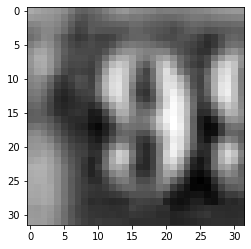

In [58]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')

In [59]:
#Predicting the digits
model.predict_classes(X_test)[5]

9

### Image 2

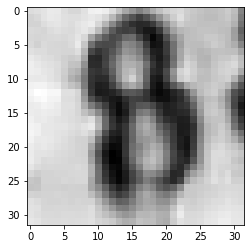

In [60]:
#Showing the image
plt.imshow(X_test[10].reshape(32,32),cmap='gray')

In [61]:
#Predicting the digits
model.predict_classes(X_test)[10]

8

### Image 3

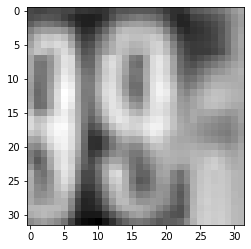

In [62]:
#Showing the image
plt.imshow(X_test[112].reshape(32,32),cmap='gray')

In [63]:
#Predicting the digits
model.predict_classes(X_test)[112]

9

In [64]:
#Predicting for all images
y_pred = model.predict_classes(X_test)
print(y_pred)

[9 2 2 ... 7 8 2]


## Summary

Using NN with batchNormalization we got 81.4% accuracy. We have predicted the classification of the images correctly.

Adam optimizer is giving better accuracy than SGD.

With drop outs, Adam optimizer is giving accuracy of 70%
